<a href="https://colab.research.google.com/github/lakshithagnk/CNN-image-classification/blob/main/Assignment_03_MINIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 CNN for image classification

1. Set up your environment: Ensure that you have installed all the required software packages.


In [1]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
from tensorflow.keras.applications import ResNet50, VGG16
from tensorflow.keras.optimizers import Adam

2. Prepare your dataset: Choose a data set from UCI Machine Learning Repository that is appropriate for classification. Download the selected dataset.

3. Split the dataset into training, validation, and testing subsets using a ratio of 60% for training and 20% each for validation and testing sets.

In [2]:
# Load the MNIST dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Combine train and test sets
images = np.concatenate((train_images, test_images), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Normalize and reshape the input data
images = images / 255.0
images = images.reshape(-1, 28, 28, 1)  # Add the channel dimension

# Split the dataset into training, validation, and testing sets
train_images, temp_images, train_labels, temp_labels = train_test_split(images, labels, test_size=0.4, random_state=42)
val_images, test_images, val_labels, test_labels = train_test_split(temp_images, temp_labels, test_size=0.5, random_state=42)

print("Training set shape:", train_images.shape, train_labels.shape)
print("Validation set shape:", val_images.shape, val_labels.shape)
print("Testing set shape:", test_images.shape, test_labels.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (42000, 28, 28, 1) (42000,)
Validation set shape: (14000, 28, 28, 1) (14000,)
Testing set shape: (14000, 28, 28, 1) (14000,)


4. Build the CNN model: A common CNN design consists of interleaving convolutional and max-pooling layers, ending with a linear classification layer

In [14]:
model = models.Sequential([
    # Convolutional layer
    layers.Conv2D(32, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=(28, 28, 1)),
    # layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    # layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    # layers.Dense(64, activation='relu'),
    # layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),

    # Output layer (10 - class)
    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_7 (Dense)             (None, 64)               

7. Train the model: Train the model using the training data for 20 epochs and plot
training and validation loss for with respect to epoch. Here, for the optimizer
you may use adam and sparse categorical crossentropy as the loss function. Set
a suitable learning rate.

In [15]:
learning_rate = 0.0005
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=1024,validation_data=(val_images, val_labels))

Epoch 1/20
42/42 [==============================] - 35s 798ms/step - loss: 1.6558 - accuracy: 0.4847 - val_loss: 0.5911 - val_accuracy: 0.8454
Epoch 2/20
42/42 [==============================] - 32s 764ms/step - loss: 0.5521 - accuracy: 0.8282 - val_loss: 0.2603 - val_accuracy: 0.9242
Epoch 3/20
42/42 [==============================] - 32s 768ms/step - loss: 0.3114 - accuracy: 0.9076 - val_loss: 0.1703 - val_accuracy: 0.9510
Epoch 4/20
42/42 [==============================] - 32s 764ms/step - loss: 0.2210 - accuracy: 0.9360 - val_loss: 0.1261 - val_accuracy: 0.9630
Epoch 5/20
42/42 [==============================] - 32s 756ms/step - loss: 0.1721 - accuracy: 0.9504 - val_loss: 0.1077 - val_accuracy: 0.9676
Epoch 6/20
42/42 [==============================] - 32s 773ms/step - loss: 0.1456 - accuracy: 0.9572 - val_loss: 0.0926 - val_accuracy: 0.9725
Epoch 7/20
42/42 [==============================] - 32s 771ms/step - loss: 0.1213 - accuracy: 0.9650 - val_loss: 0.0807 - val_accuracy: 0.9742

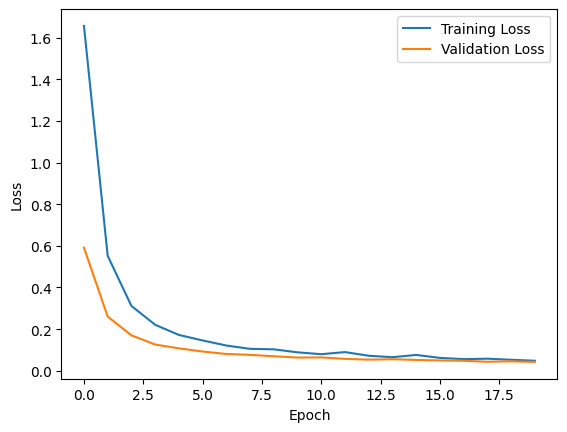

In [17]:
# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

10. Evaluate the Model: After training, evaluate the model’s performance on the testing
dataset. Record the train/test accuracy, confusion matrix, precision and recall.

438/438 [==============================] - 3s 6ms/step - loss: 0.0531 - accuracy: 0.9848
Test accuracy: 0.9847857356071472
438/438 [==============================] - 3s 6ms/step


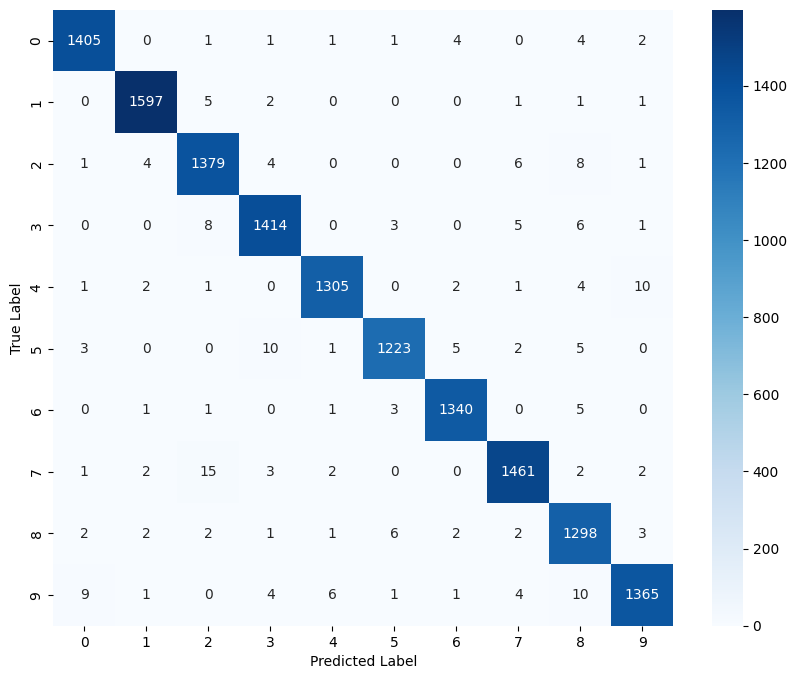

In [18]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)

# Predict the classes for test images
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [19]:
# precision and recall
report = classification_report(test_labels, predicted_classes, target_names=[str(i) for i in range(10)])
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1419
           1       0.99      0.99      0.99      1607
           2       0.98      0.98      0.98      1403
           3       0.98      0.98      0.98      1437
           4       0.99      0.98      0.99      1326
           5       0.99      0.98      0.98      1249
           6       0.99      0.99      0.99      1351
           7       0.99      0.98      0.98      1488
           8       0.97      0.98      0.98      1319
           9       0.99      0.97      0.98      1401

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



In [20]:
# precision and recall
precision = precision_score(test_labels, predicted_classes, average='weighted')
recall = recall_score(test_labels, predicted_classes, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Precision: 0.9848
Recall: 0.9848


11. Plot training and validation loss for with respect to epoch for different learning rates
such as 0.0001, 0.001, 0.01, and 0.1. Comment on your results and select a learning
rate with a justification.

**learning_rate = 0.0001**

Epoch 1/20
42/42 [==============================] - 35s 807ms/step - loss: 2.2079 - accuracy: 0.3002 - val_loss: 2.0497 - val_accuracy: 0.5501
Epoch 2/20
42/42 [==============================] - 32s 763ms/step - loss: 1.8278 - accuracy: 0.4767 - val_loss: 1.4274 - val_accuracy: 0.7046
Epoch 3/20
42/42 [==============================] - 33s 778ms/step - loss: 1.2802 - accuracy: 0.6144 - val_loss: 0.8789 - val_accuracy: 0.8034
Epoch 4/20
42/42 [==============================] - 32s 773ms/step - loss: 0.9012 - accuracy: 0.7172 - val_loss: 0.5853 - val_accuracy: 0.8619
Epoch 5/20
42/42 [==============================] - 32s 764ms/step - loss: 0.6765 - accuracy: 0.7900 - val_loss: 0.4338 - val_accuracy: 0.8953
Epoch 6/20
42/42 [==============================] - 32s 773ms/step - loss: 0.5384 - accuracy: 0.8399 - val_loss: 0.3416 - val_accuracy: 0.9118
Epoch 7/20
42/42 [==============================] - 32s 776ms/step - loss: 0.4460 - accuracy: 0.8677 - val_loss: 0.2849 - val_accuracy: 0.9227

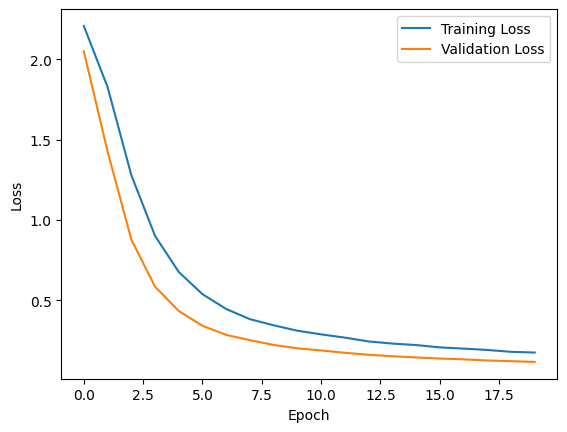

In [21]:
model1 = models.Sequential([
    # Convolutional layer
    layers.Conv2D(32, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.MaxPooling2D((2, 2)),

    # Flatten
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dropout(0.5),

    # Output layer (10 - class)
    layers.Dense(10, activation='softmax')
])

learning_rate = 0.0001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model1.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history1 = model1.fit(train_images, train_labels, epochs=20, batch_size=1024,validation_data=(val_images, val_labels))

# Plotting training and validation loss
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**learning_rate = 0.001**

Epoch 1/20
42/42 [==============================] - 35s 812ms/step - loss: 1.2072 - accuracy: 0.6160 - val_loss: 0.3149 - val_accuracy: 0.9024
Epoch 2/20
42/42 [==============================] - 33s 778ms/step - loss: 0.3039 - accuracy: 0.9083 - val_loss: 0.1447 - val_accuracy: 0.9569
Epoch 3/20
42/42 [==============================] - 33s 776ms/step - loss: 0.1713 - accuracy: 0.9495 - val_loss: 0.1300 - val_accuracy: 0.9602
Epoch 4/20
42/42 [==============================] - 33s 786ms/step - loss: 0.1529 - accuracy: 0.9554 - val_loss: 0.0821 - val_accuracy: 0.9747
Epoch 5/20
42/42 [==============================] - 32s 766ms/step - loss: 0.1059 - accuracy: 0.9690 - val_loss: 0.0797 - val_accuracy: 0.9741
Epoch 6/20
42/42 [==============================] - 33s 783ms/step - loss: 0.1023 - accuracy: 0.9693 - val_loss: 0.0711 - val_accuracy: 0.9774
Epoch 7/20
42/42 [==============================] - 32s 775ms/step - loss: 0.0911 - accuracy: 0.9735 - val_loss: 0.0588 - val_accuracy: 0.9815

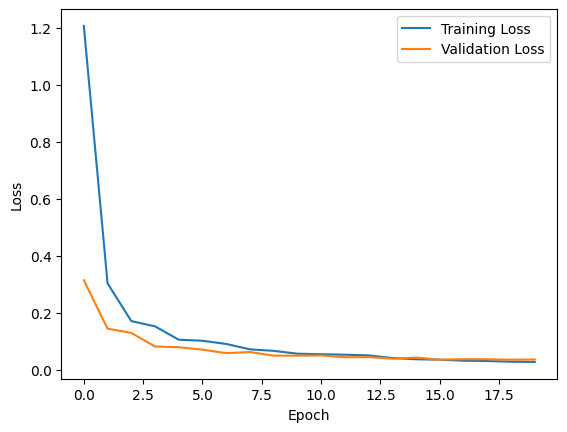

In [22]:
model2 = models.Sequential([
    # Convolutional layer
    layers.Conv2D(32, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.MaxPooling2D((2, 2)),

    # Flatten
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dropout(0.5),

    # Output layer (10 - class)
    layers.Dense(10, activation='softmax')
])

learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model2.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history2 = model2.fit(train_images, train_labels, epochs=20, batch_size=1024,validation_data=(val_images, val_labels))

# Plotting training and validation loss
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

**learning_rate = 0.01**

Epoch 1/20
42/42 [==============================] - 34s 778ms/step - loss: 0.6073 - accuracy: 0.7959 - val_loss: 0.0886 - val_accuracy: 0.9721
Epoch 2/20
42/42 [==============================] - 32s 761ms/step - loss: 0.0847 - accuracy: 0.9744 - val_loss: 0.0529 - val_accuracy: 0.9829
Epoch 3/20
42/42 [==============================] - 32s 766ms/step - loss: 0.0526 - accuracy: 0.9844 - val_loss: 0.0493 - val_accuracy: 0.9842
Epoch 4/20
42/42 [==============================] - 33s 783ms/step - loss: 0.0573 - accuracy: 0.9833 - val_loss: 0.0651 - val_accuracy: 0.9797
Epoch 5/20
42/42 [==============================] - 32s 773ms/step - loss: 0.0546 - accuracy: 0.9831 - val_loss: 0.0424 - val_accuracy: 0.9882
Epoch 6/20
42/42 [==============================] - 33s 783ms/step - loss: 0.0303 - accuracy: 0.9913 - val_loss: 0.0376 - val_accuracy: 0.9894
Epoch 7/20
42/42 [==============================] - 33s 788ms/step - loss: 0.0224 - accuracy: 0.9935 - val_loss: 0.0831 - val_accuracy: 0.9821

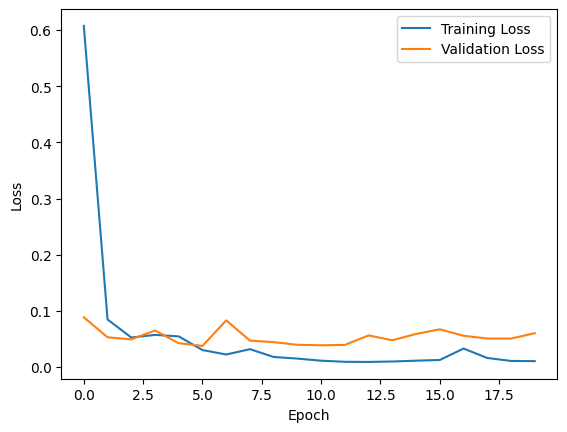

In [23]:
model3 = models.Sequential([
    # Convolutional layer
    layers.Conv2D(32, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.MaxPooling2D((2, 2)),

    # Flatten
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dropout(0.5),

    # Output layer (10 - class)
    layers.Dense(10, activation='softmax')
])

learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model3.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history3 = model3.fit(train_images, train_labels, epochs=20, batch_size=1024,validation_data=(val_images, val_labels))

# Plotting training and validation loss
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

438/438 [==============================] - 2s 6ms/step - loss: 0.0531 - accuracy: 0.9848
Test accuracy: 0.9847857356071472
438/438 [==============================] - 2s 5ms/step


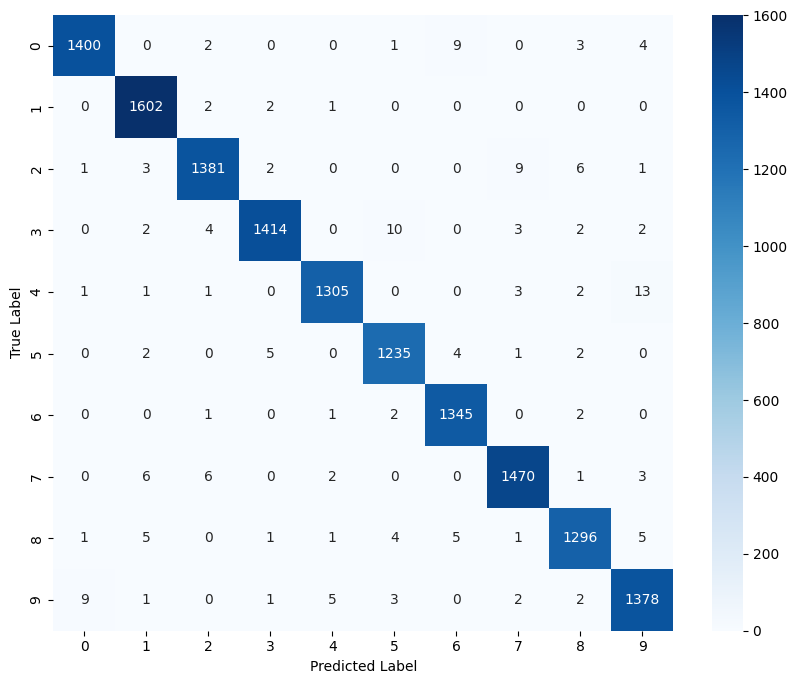

In [24]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_accuracy)

# Predict the classes for test images
predictions = model3.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**learning_rate = 0.1**

Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 40s 909ms/step - accuracy: 0.0982 - loss: 50.5510 - val_accuracy: 0.1301 - val_loss: 94.5472
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 922ms/step - accuracy: 0.1060 - loss: 79.1608 - val_accuracy: 0.0944 - val_loss: 18.2473
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 37s 875ms/step - accuracy: 0.1061 - loss: 2342.4351 - val_accuracy: 0.0971 - val_loss: 480.1347
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 45s 964ms/step - accuracy: 0.1089 - loss: 1241.6759 - val_accuracy: 0.1571 - val_loss: 370.5522
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 36s 871ms/step - accuracy: 0.1286 - loss: 571.0792 - val_accuracy: 0.3019 - val_loss: 103.2453
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 869ms/step - accuracy: 0.2103 - loss: 219.4522 - val_accuracy: 0.3371 - val_loss: 58.4132
Epoch 7/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 868ms/step - accuracy: 0.1892 - loss: 1592.3445 - val_accuracy: 0.1138 - val_loss: 1031.6666
Epoch 8/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 43s 918ms/step - accuracy: 0.106

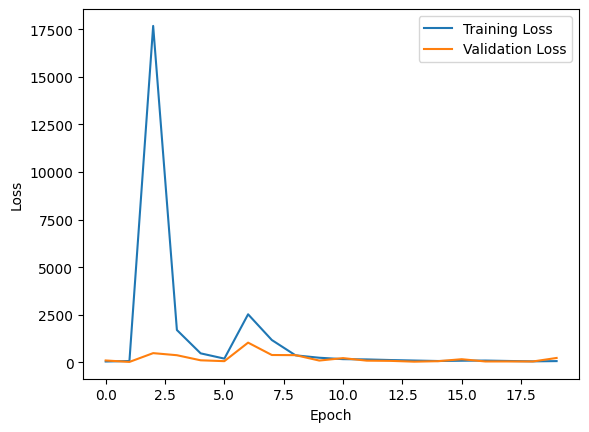

In [4]:
model4 = models.Sequential([
    # Convolutional layer
    layers.Conv2D(32, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01), input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.MaxPooling2D((2, 2)),

    # Flatten
    layers.Flatten(),

    # Fully connected layer
    layers.Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.01)),
    layers.Dropout(0.5),

    # Output layer (10 - class)
    layers.Dense(10, activation='softmax')
])

learning_rate = 0.1
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
model4.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history4 = model4.fit(train_images, train_labels, epochs=20, batch_size=1024,validation_data=(val_images, val_labels))

# Plotting training and validation loss
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 2 Compare your network with state-of-the-art networks

12. Choose two state-of-the-art pre-trained model
13. Load the pre-trained model and fine-tune it for the your dataset


In [4]:
# Adjust MNIST images to RGB for pretrained models
train_images_rgb = np.repeat(train_images, 3, axis = -1)
val_images_rgb = np.repeat(val_images, 3, axis = -1)
test_images_rgb = np.repeat(test_images, 3, axis = -1)

# Resize images to 32x32
train_images_rgb = tf.image.resize(train_images_rgb, [32, 32])
val_images_rgb = tf.image.resize(val_images_rgb, [32, 32])
test_images_rgb = tf.image.resize(test_images_rgb, [32, 32])

# Function to build and fine-tune a model
def build_fine_tune_model(base_model, input_shape, trainable = False):
    # Freeze the base model layers
    base_model.trainable = trainable

    # Build the model
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation = 'relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation = 'softmax')
    ])
    return model


# Load pretrained ResNet50
resnet_base = ResNet50(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))
resnet_model = build_fine_tune_model(resnet_base, input_shape = (32, 32, 3))

# Compile the ResNet model
resnet_model.compile(optimizer = Adam(learning_rate = 0.0005), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


# Load pretrained VGG16
vgg_base = VGG16(weights='imagenet', include_top = False, input_shape = (32, 32, 3))
vgg_model = build_fine_tune_model(vgg_base, input_shape = (32, 32, 3))

# Compile the VGG model
vgg_model.compile(optimizer = Adam(learning_rate = 0.0005), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


58889256/58889256 [==============================] - 0s 0us/step


14. Train the fine-tuned model using the same training and testing data split as your custom CNN model
15. Record training and validation loss values for each epoch

In [5]:
# Train ResNet50
history_resnet = resnet_model.fit(train_images_rgb, train_labels, validation_data = (val_images_rgb, val_labels), epochs = 10, batch_size = 1024)


Epoch 1/10
42/42 [==============================] - 227s 5s/step - loss: 2.2055 - accuracy: 0.2880 - val_loss: 1.5844 - val_accuracy: 0.5399
Epoch 2/10
42/42 [==============================] - 222s 5s/step - loss: 1.5345 - accuracy: 0.4935 - val_loss: 1.2776 - val_accuracy: 0.6932
Epoch 3/10
42/42 [==============================] - 223s 5s/step - loss: 1.3023 - accuracy: 0.5873 - val_loss: 1.0736 - val_accuracy: 0.7205
Epoch 4/10
42/42 [==============================] - 220s 5s/step - loss: 1.1411 - accuracy: 0.6469 - val_loss: 0.9140 - val_accuracy: 0.7685
Epoch 5/10
42/42 [==============================] - 221s 5s/step - loss: 1.0111 - accuracy: 0.6912 - val_loss: 0.8006 - val_accuracy: 0.7986
Epoch 6/10
42/42 [==============================] - 221s 5s/step - loss: 0.9200 - accuracy: 0.7222 - val_loss: 0.7225 - val_accuracy: 0.8143
Epoch 7/10
42/42 [==============================] - 219s 5s/step - loss: 0.8404 - accuracy: 0.7504 - val_loss: 0.6529 - val_accuracy: 0.8304
Epoch 8/10
42

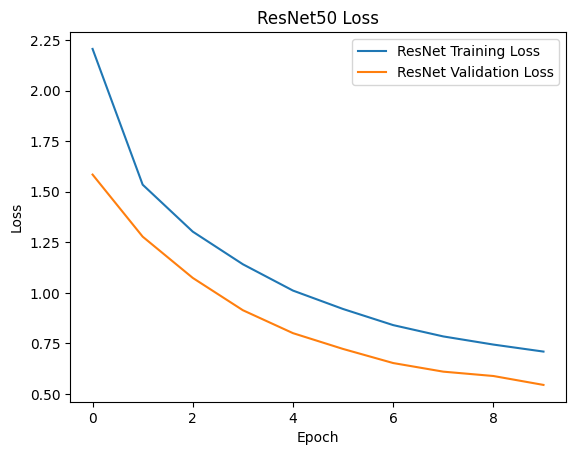

In [6]:
# Plot Training and Validation Loss for ResNet
plt.plot(history_resnet.history['loss'], label = 'ResNet Training Loss')
plt.plot(history_resnet.history['val_loss'], label = 'ResNet Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("ResNet50 Loss")
plt.show()


In [7]:
# Train VGG16
history_vgg = vgg_model.fit(train_images_rgb, train_labels, validation_data = (val_images_rgb, val_labels), epochs = 10, batch_size = 1024)

Epoch 1/10
42/42 [==============================] - 268s 6s/step - loss: 1.9785 - accuracy: 0.3189 - val_loss: 1.4494 - val_accuracy: 0.6606
Epoch 2/10
42/42 [==============================] - 265s 6s/step - loss: 1.3439 - accuracy: 0.5926 - val_loss: 1.0446 - val_accuracy: 0.7474
Epoch 3/10
42/42 [==============================] - 266s 6s/step - loss: 1.0437 - accuracy: 0.6945 - val_loss: 0.8149 - val_accuracy: 0.7921
Epoch 4/10
42/42 [==============================] - 265s 6s/step - loss: 0.8641 - accuracy: 0.7444 - val_loss: 0.6763 - val_accuracy: 0.8229
Epoch 5/10
42/42 [==============================] - 267s 6s/step - loss: 0.7457 - accuracy: 0.7821 - val_loss: 0.5775 - val_accuracy: 0.8499
Epoch 6/10
42/42 [==============================] - 266s 6s/step - loss: 0.6565 - accuracy: 0.8092 - val_loss: 0.5058 - val_accuracy: 0.8681
Epoch 7/10
42/42 [==============================] - 267s 6s/step - loss: 0.5861 - accuracy: 0.8315 - val_loss: 0.4480 - val_accuracy: 0.8831
Epoch 8/10
42

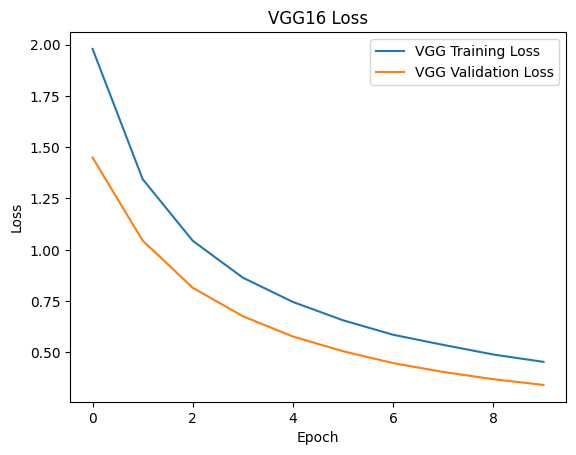

In [8]:
# Plot Training and Validation Loss for VGG16
plt.plot(history_vgg.history['loss'], label = 'VGG Training Loss')
plt.plot(history_vgg.history['val_loss'], label = 'VGG Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("VGG16 Loss")
plt.show()

16. Evaluate the fine-tuned model on the testing dataset and calculate the test accuracy

In [9]:
# Evaluate and Compare Both Models
resnet_test_loss, resnet_test_accuracy = resnet_model.evaluate(test_images_rgb, test_labels)
vgg_test_loss, vgg_test_accuracy = vgg_model.evaluate(test_images_rgb, test_labels)

print(f"ResNet50 Test Accuracy: {resnet_test_accuracy:.4f}")
print(f"VGG16 Test Accuracy: {vgg_test_accuracy:.4f}")



438/438 [==============================] - 192s 438ms/step - loss: 0.3452 - accuracy: 0.9078
ResNet50 Test Accuracy: 0.8517
VGG16 Test Accuracy: 0.9078


In [11]:
# Predict and Generate Confusion Matrices
def plot_confusion_matrix(model, test_images, test_labels, model_name):
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis = 1)
    conf_matrix = confusion_matrix(test_labels, predicted_classes)

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    print(f"Classification Report for {model_name}:")
    print(classification_report(test_labels, predicted_classes, target_names=[str(i) for i in range(10)]))



438/438 [==============================] - 83s 187ms/step


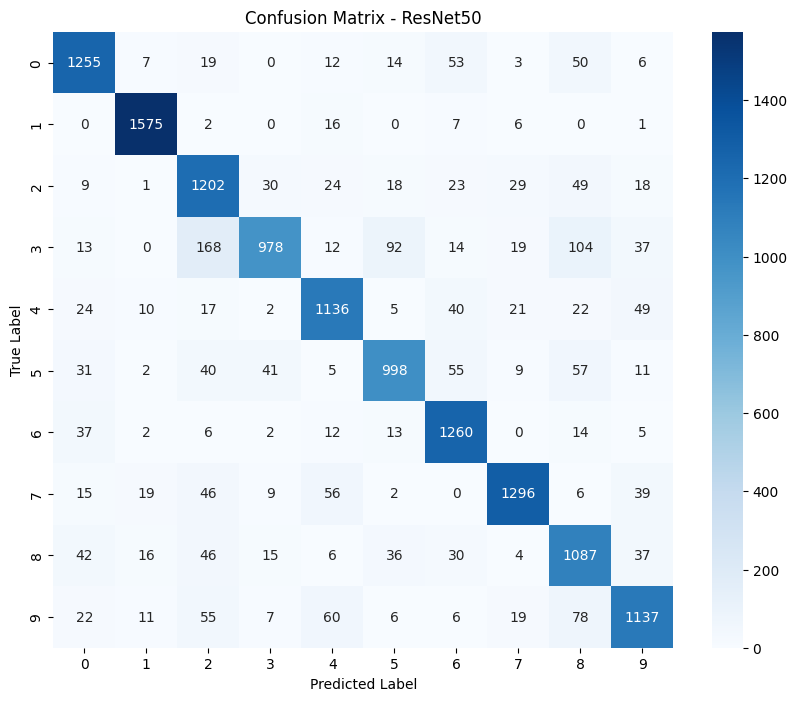

Classification Report for ResNet50:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1419
           1       0.96      0.98      0.97      1607
           2       0.75      0.86      0.80      1403
           3       0.90      0.68      0.78      1437
           4       0.85      0.86      0.85      1326
           5       0.84      0.80      0.82      1249
           6       0.85      0.93      0.89      1351
           7       0.92      0.87      0.90      1488
           8       0.74      0.82      0.78      1319
           9       0.85      0.81      0.83      1401

    accuracy                           0.85     14000
   macro avg       0.85      0.85      0.85     14000
weighted avg       0.86      0.85      0.85     14000



In [12]:
# ResNet Confusion Matrix and Report
plot_confusion_matrix(resnet_model, test_images_rgb, test_labels, "ResNet50")

438/438 [==============================] - 193s 441ms/step


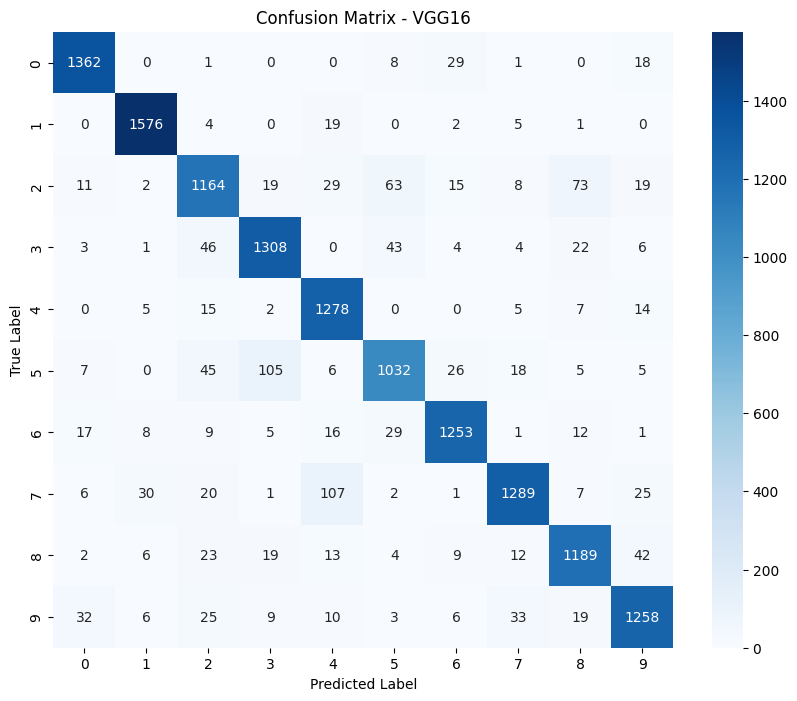

Classification Report for VGG16:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1419
           1       0.96      0.98      0.97      1607
           2       0.86      0.83      0.85      1403
           3       0.89      0.91      0.90      1437
           4       0.86      0.96      0.91      1326
           5       0.87      0.83      0.85      1249
           6       0.93      0.93      0.93      1351
           7       0.94      0.87      0.90      1488
           8       0.89      0.90      0.90      1319
           9       0.91      0.90      0.90      1401

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



In [13]:
# VGG Confusion Matrix and Report
plot_confusion_matrix(vgg_model, test_images_rgb, test_labels, "VGG16")